In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid') 
import warnings 
warnings.filterwarnings('ignore')

In [130]:
df = pd.read_csv('/home/enacom/Downloads/html5up-phantom/exploratory_data_analysis/data/insurance.csv')

## Understanding the data

In [131]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [133]:
df.shape

(1338, 7)

In [134]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Cleaning the data 

In [135]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [136]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [137]:
df.drop_duplicates(keep='first',inplace=True)

## Working with graphs

### Univariate Analysis for Numerical Features

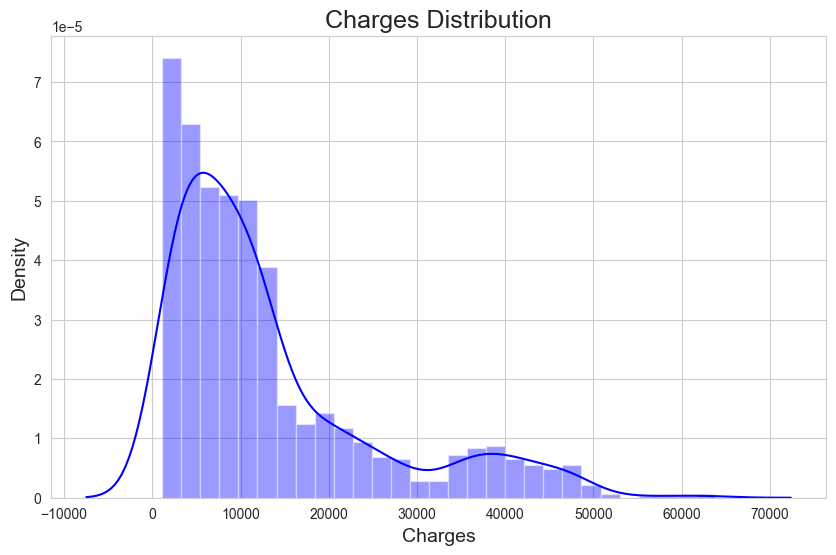

In [138]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='b')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

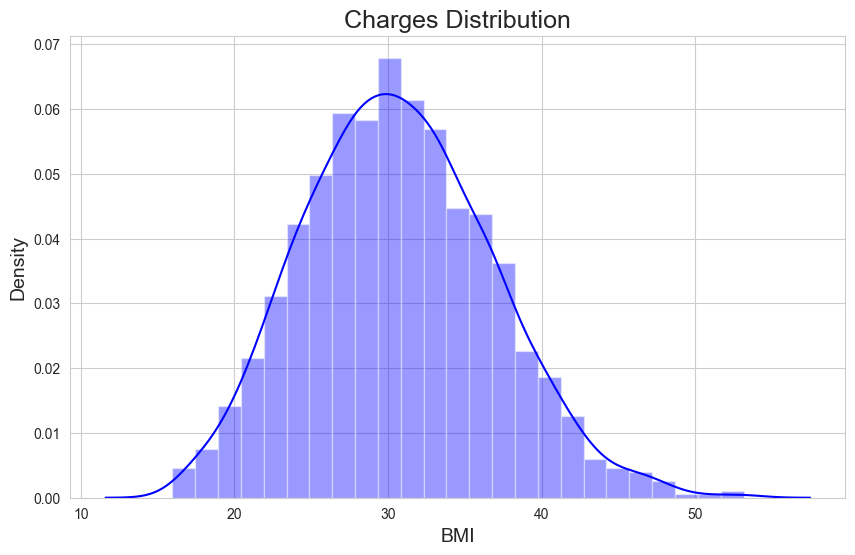

In [139]:
plt.figure(figsize=(10,6))
sns.distplot(df.bmi,color='b')
plt.title('Charges Distribution',size=18)
plt.xlabel('BMI',size=14)
plt.ylabel('Density',size=14)
plt.show()

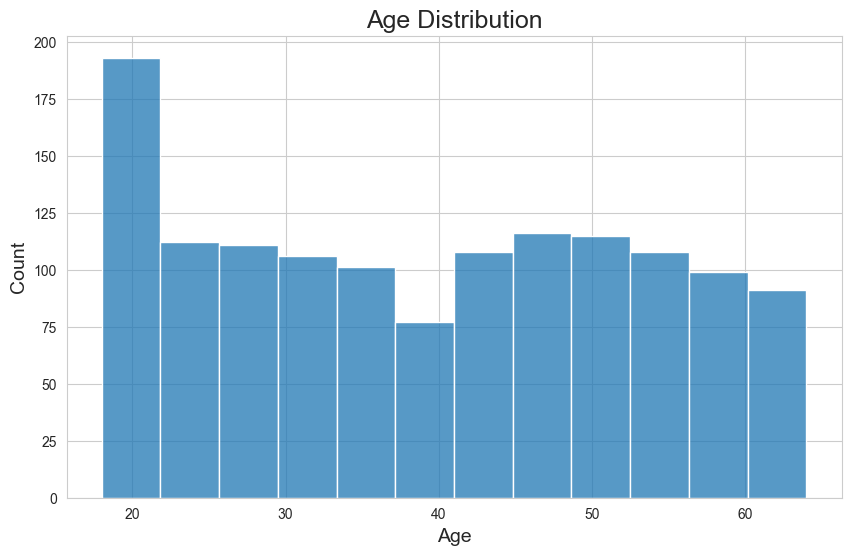

In [140]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

#### Dealing with outliers

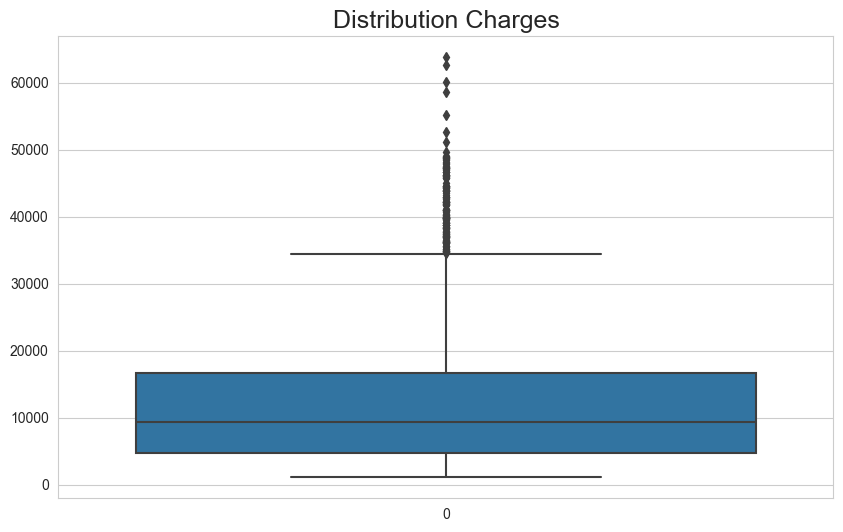

In [141]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

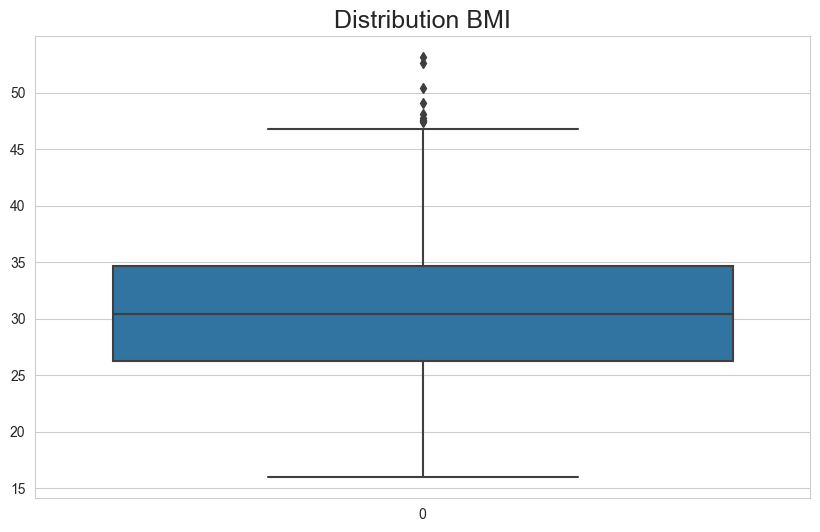

In [142]:
plt.figure(figsize = (10,6))
sns.boxplot(df.bmi)
plt.title('Distribution BMI',size=18)
plt.show()

In [143]:
columns = ["charges", "bmi"]

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    


In [144]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


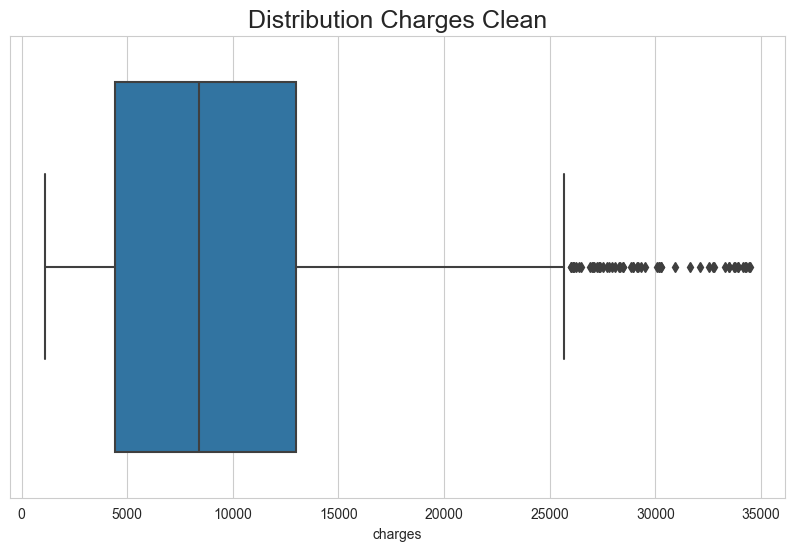

In [145]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='charges', data=df)
plt.title('Distribution Charges Clean', size=18)
plt.show()


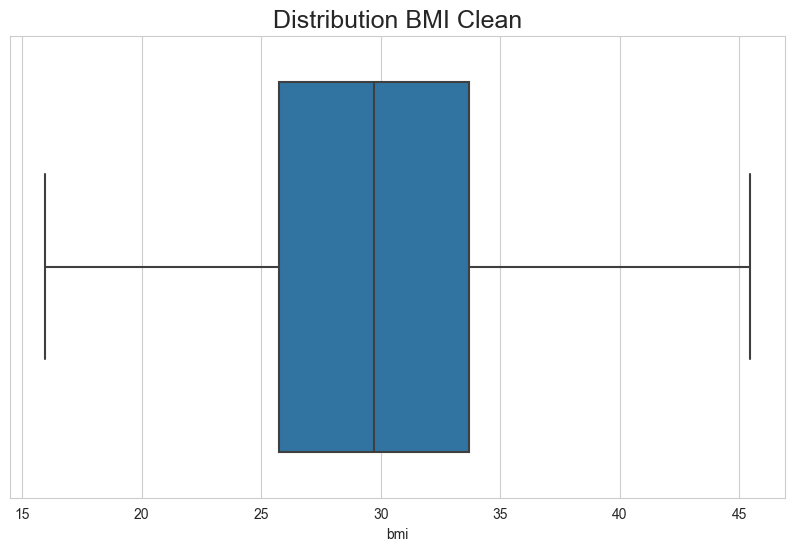

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', data=df)
plt.title('Distribution BMI Clean', size=18)
plt.show()

### Univariate Analysis for Categorical Features 

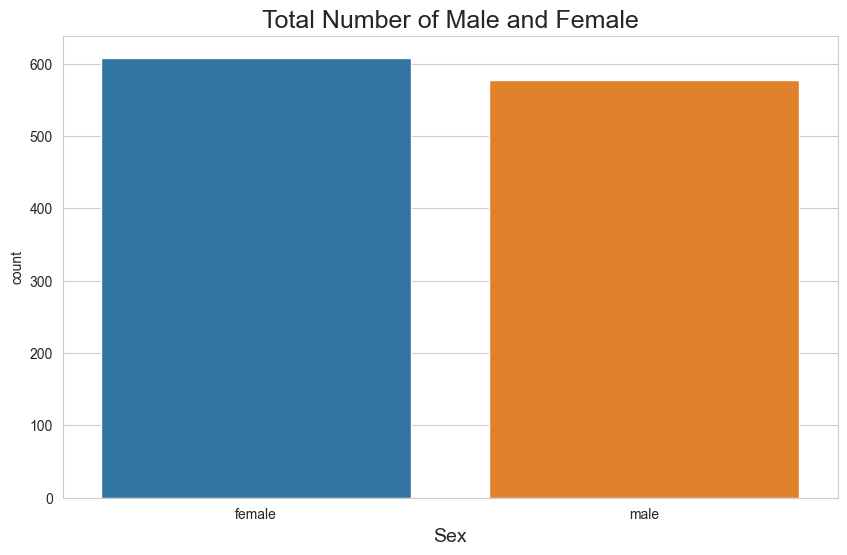

In [147]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

In [148]:
df["children"].value_counts()

children
0    519
1    287
2    202
3    137
4     23
5     17
Name: count, dtype: int64

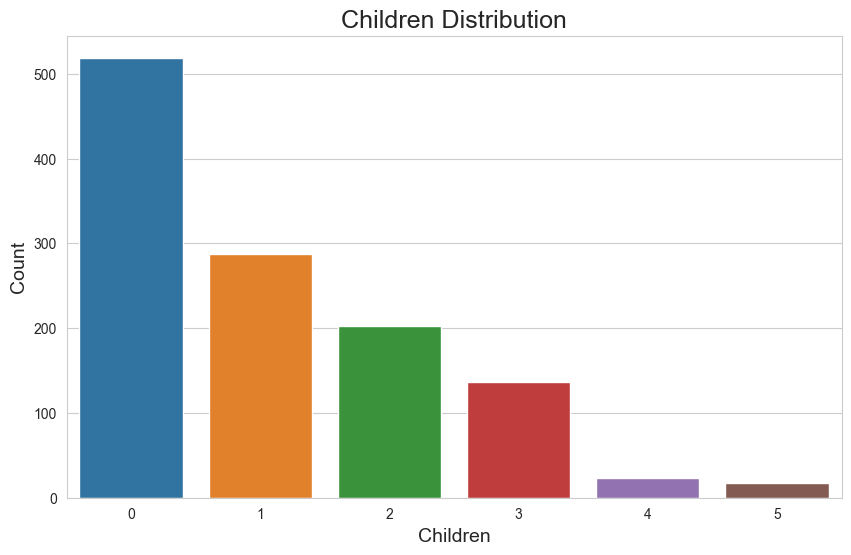

In [149]:

df['children'] = df['children'].astype(int)
plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution', size=18)
plt.xlabel('Children', size=14)
plt.ylabel('Count', size=14)
plt.show()


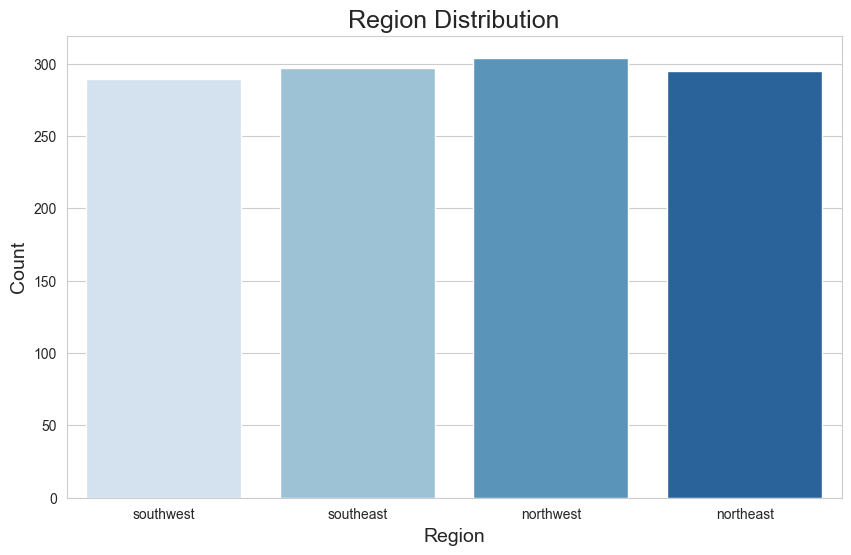

In [150]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, palette='Blues')
plt.title('Region Distribution', size=18)
plt.xlabel('Region', size=14)
plt.ylabel('Count', size=14)
plt.show()

### Bivariate Analysis 

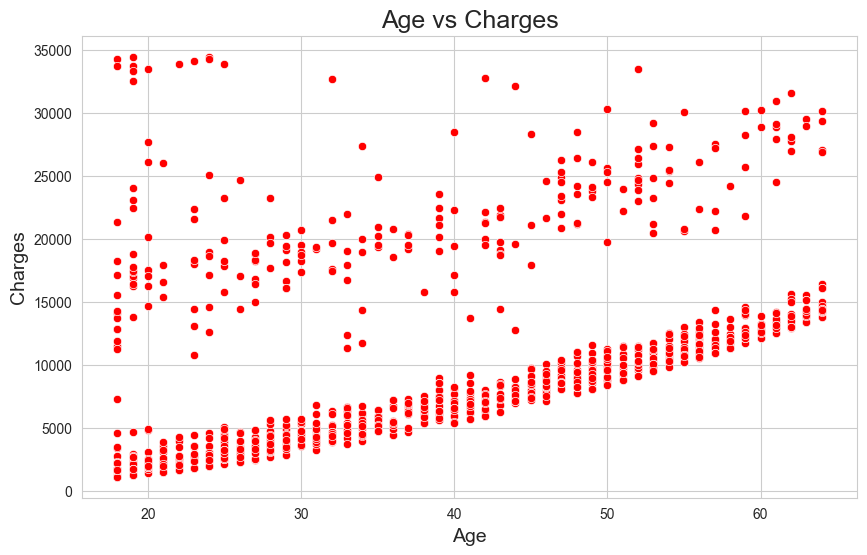

In [151]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='r',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

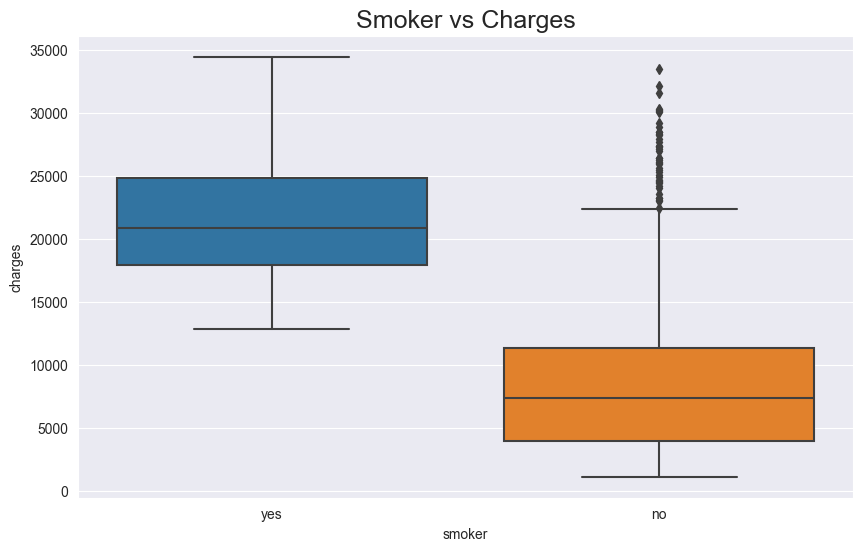

In [152]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

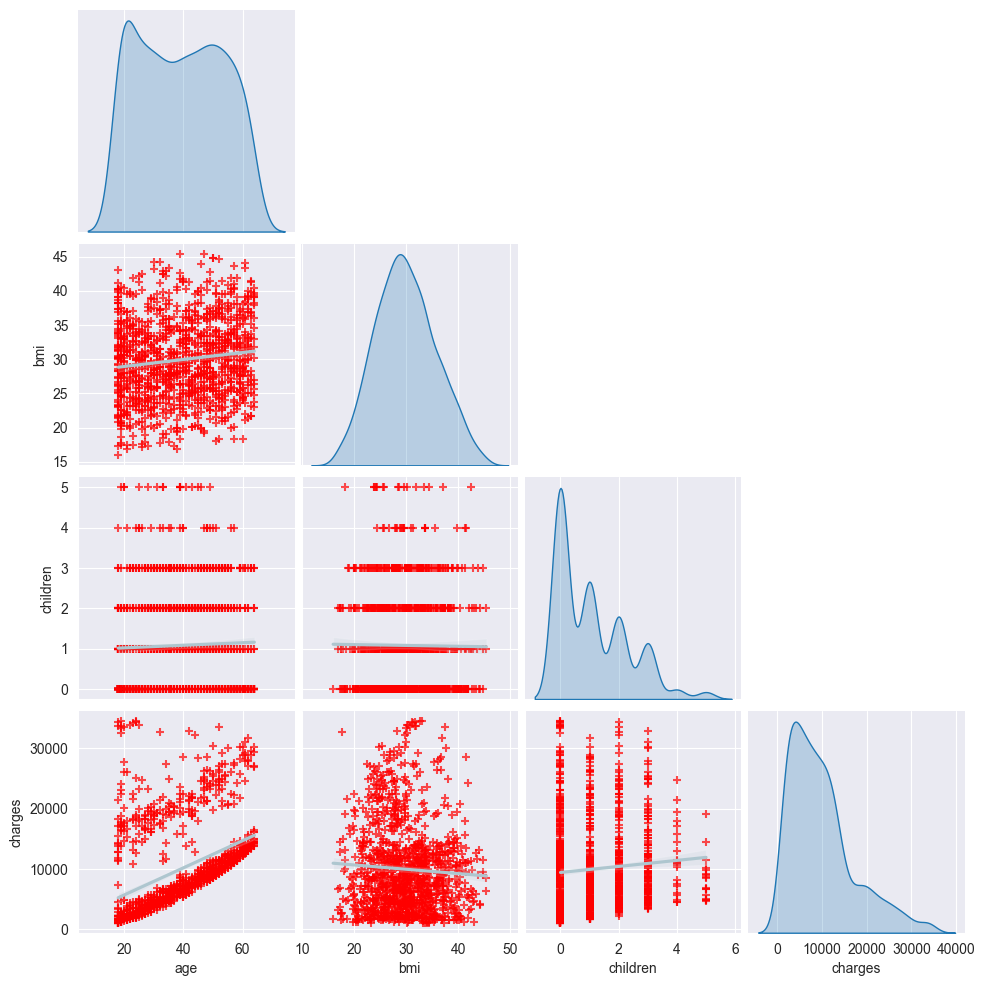

In [153]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'red'}},
                 corner=True);